In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torchmetrics.classification import BinaryAccuracy, BinaryF1Score
from tqdm import tqdm
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Result/Data/training_stroke5.csv")
data = data.drop(["Unnamed: 0"] ,axis = 1)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
0,29,0,0,83.990000,33.200000,0,1,0,0,1,1,0,0,0,0,0,0
1,56,0,0,109.010000,23.200000,0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,0,61.200000,35.400000,0,1,0,0,1,0,0,1,0,0,1,0
3,37,0,0,156.700000,36.900000,0,1,0,0,1,0,0,1,0,0,1,0
4,39,0,0,56.360000,22.400000,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,67,0,0,200.064328,27.867577,1,1,0,0,1,0,0,1,0,0,1,1
48196,75,0,0,86.797359,30.997204,0,1,0,0,1,0,0,0,1,0,1,1
48197,70,0,0,204.908048,31.099787,0,1,0,0,1,0,0,0,1,0,0,1
48198,78,1,0,78.060464,30.065614,0,0,1,0,1,0,0,0,1,0,0,1


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['smoking_status']])

# Get the categories that were encoded
categories = encoder.categories_

# Create custom column names based on the categories
column_names = [f'smoking_status_{cat}' for cat in categories[0][0:]]

# Create a new DataFrame with the one-hot encoded columns and custom column names
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenate the new DataFrame with the original DataFrame, drop the original 'smoking_status' column
data = pd.concat([data, encoded_df], axis=1).drop(columns=['smoking_status'] ,axis = 1)
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,smoking_status_0,smoking_status_1,smoking_status_2
0,29,0,0,83.990000,33.200000,1,0,0,1,1,0,0,0,0,0,0,1.0,0.0,0.0
1,56,0,0,109.010000,23.200000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
2,37,0,0,61.200000,35.400000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
3,37,0,0,156.700000,36.900000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
4,39,0,0,56.360000,22.400000,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48195,67,0,0,200.064328,27.867577,1,0,0,1,0,0,1,0,0,1,1,0.0,1.0,0.0
48196,75,0,0,86.797359,30.997204,1,0,0,1,0,0,0,1,0,1,1,1.0,0.0,0.0
48197,70,0,0,204.908048,31.099787,1,0,0,1,0,0,0,1,0,0,1,1.0,0.0,0.0
48198,78,1,0,78.060464,30.065614,0,1,0,1,0,0,0,1,0,0,1,1.0,0.0,0.0


In [6]:
sc = MinMaxScaler()


X = data.drop(["stroke"] ,axis = 1)
y = data["stroke"]

#X[["age", "avg_glucose_level", "bmi"]] = sc.fit_transform(X[["age", "avg_glucose_level", "bmi"]])

X_train = X
y_train = y

mu = X_train.mean()
std = X_train.std() + 1e-5

X_train = (X_train - mu) / std

X_train = X_train.values
y_train = y_train.values

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_train = X_train.reshape(len(X_train), 3, 6)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 256

X_B_train, X_val , y_B_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_B_train, y_B_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size ,shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size ,shuffle=False)

In [9]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [10]:
len(data[data["stroke"] == 0]) / len(data[data["stroke"] == 1])

7.481435861340841

In [11]:
import torch
import torch.nn as nn

class Block(nn.Module):
    def __init__(self ,inChanel,out1 ,out2, out3 ,outChanel):
        super(Block, self).__init__()
        self.input = inChanel
        self.conv1 = nn.Conv2d(inChanel, out1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out1, out2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(out1, outChanel, kernel_size=2, padding=1)
        self.conv4 = nn.Conv2d(out2, outChanel, kernel_size=2, padding=1)
        temp = outChanel // 2
        self.conv5 = nn.Conv2d(outChanel, temp, kernel_size=1, padding=0)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.relu = nn.PReLU()
        self.dropout = nn.Dropout(0.5)
        self.batchnorm = nn.BatchNorm2d(temp)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        #x = self.conv2(x)
        #x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        #x = self.conv4(x)
        #x = self.relu(x)
        x = self.conv5(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        x = self.pooling(x)
        x = self.dropout(x)
        return x

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        self.block1 = Block(1, 8, 16, 32, 32)
        self.block2 = Block(16, 32, 64, 128, 64)
        self.block3 = Block(32, 64, 512, 800, 128)

        self.linear1 = nn.Linear(64, 32)
        self.linear2 = nn.Linear(32, 8)
        self.linear3 = nn.Linear(8, 1)
        self.pooling = nn.MaxPool2d(kernel_size=2)
        self.relu = nn.PReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        #x = self.pooling(x)
        #print(x.size())
        x = self.dropout(x)
        x = x.squeeze()
        #print(x.size())
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        x = self.dropout(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import compute_class_weight
import time
from torchmetrics import Accuracy
from torchmetrics.classification import BinaryAccuracy
from sklearn.metrics import accuracy_score, f1_score

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = CNNClassifier().to(device)

class_weights = compute_class_weight(class_weight="balanced", classes=y_train.unique().detach().numpy(), y=y_train.detach().numpy())
pos_weight = torch.tensor([class_weights[1]], dtype=torch.float32).to(device) #
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([len(data[data["stroke"] == 0]) / len(data[data["stroke"] == 1]) *  2], dtype=torch.float32).to(device)) # Ensure it's on the same device  pos_weight=torch.tensor([24], dtype=torch.float32).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10.0, gamma=0.5)

num_epochs = 60

best_acc = 0
best_loss = 100
loss_train_hist = []
acc_train_hist = []
loss_val_hist = []
acc_val_hist = []
f1_val = []
f1_train = []
bestF1 = 0
metric = BinaryF1Score().to(device)

for epoch in range(num_epochs):
    start_time = time.time()
    epoch_loss = 0.0
    correct_preds = 0
    total_preds = 0
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        inputs = inputs.unsqueeze(1)
        inputs = inputs.float()
        targets = targets.float()

        outputs = model(inputs)

        loss = criterion(outputs.squeeze(), targets)

        loss.backward()

        optimizer.step()


        epoch_loss += loss.item()

        predictions = torch.round(torch.sigmoid(outputs))

        for i in range(targets.size(0)):
            if predictions[i] == targets[i]:
                correct_preds += 1

        total_preds += targets.size(0)


    model.eval()
    with torch.no_grad():
        acc_val = BinaryAccuracy().to(device)
        loss_val = AverageMeter()#val_loader ,
        metric.reset()
        for (inputs ,targets) in val_loader:
            inputs ,targets = inputs.to(device) ,targets.to(device)
            inputs = inputs.unsqueeze(1)
            inputs = inputs.float()
            targets = targets.float()
            outputs_val = model(inputs)
            loss_val.update(loss.item())
            acc_val(outputs_val.squeeze(), targets)
            #print(targets.size())
            #print(outputs_val.squeeze().size())

            metric.update(outputs_val.squeeze(), targets.int())
            #(acc_val.compute() > best_acc) and  loss_val.avg < best_loss
            if (100.*metric.compute().item() > bestF1):
                print("model save!")
                torch.save(model, f'/content/drive/MyDrive/Result/New-Weight/Model5.pt')
                best_acc = acc_val.compute()
                best_loss = loss_val.avg
                bestF1 = 100.* metric.compute().item()


    accuracy = correct_preds / total_preds
    avg_loss = epoch_loss / len(train_loader)  # Use 'train_loader' instead of 'dataloader'
    end_time = time.time()
    loss_train_hist.append(avg_loss)
    acc_train_hist.append(accuracy)
    loss_val_hist.append(loss_val.avg)
    f1_val.append(100.*metric.compute().item())
    #f1_train.append(100.*metric.compute().item())
    acc_val_hist.append(acc_val.compute().item())
    epoch_time = end_time - start_time
    #scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss Train: {avg_loss:.4f}, Accuracy Train: {accuracy:.4f}, Time taken: {epoch_time:.2f} seconds")
    print(f"Average Loss Val: {loss_val.avg:.4f}, Accuracy Val: {acc_val.compute():.4f} ,f1 : {100.*metric.compute().item()}")


model save!
model save!
model save!
Epoch 1/60, Average Loss Train: 1.7515, Accuracy Train: 0.5134, Time taken: 4.44 seconds
Average Loss Val: 1.5628, Accuracy Val: 0.7848 ,f1 : 33.68488252162933
Epoch 2/60, Average Loss Train: 1.6344, Accuracy Train: 0.6278, Time taken: 4.80 seconds
Average Loss Val: 1.4567, Accuracy Val: 0.5468 ,f1 : 33.26714634895325
Epoch 3/60, Average Loss Train: 1.5619, Accuracy Train: 0.6977, Time taken: 4.66 seconds
Average Loss Val: 1.4596, Accuracy Val: 0.5797 ,f1 : 34.81338620185852
Epoch 4/60, Average Loss Train: 1.5372, Accuracy Train: 0.7047, Time taken: 3.66 seconds
Average Loss Val: 1.3677, Accuracy Val: 0.5832 ,f1 : 34.98381972312927
Epoch 5/60, Average Loss Train: 1.5449, Accuracy Train: 0.7002, Time taken: 3.68 seconds
Average Loss Val: 1.5116, Accuracy Val: 0.5426 ,f1 : 33.18684697151184
model save!
Epoch 6/60, Average Loss Train: 1.5075, Accuracy Train: 0.7196, Time taken: 3.16 seconds
Average Loss Val: 1.6079, Accuracy Val: 0.6295 ,f1 : 37.2231990

In [41]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [12]:
test = pd.read_csv("/content/drive/MyDrive/Result/Data/testing_stroke5.csv")
test = test.drop(["Unnamed: 0"] ,axis = 1)
tempTest = test

encoded_data = encoder.fit_transform(test[['smoking_status']])

# Get the categories that were encoded
categories = encoder.categories_

# Create custom column names based on the categories
column_names = [f'smoking_status_{cat}' for cat in categories[0][0:]]

# Create a new DataFrame with the one-hot encoded columns and custom column names
encoded_df = pd.DataFrame(encoded_data, columns=column_names)

# Concatenate the new DataFrame with the original DataFrame, drop the original 'smoking_status' column
test = pd.concat([test, encoded_df], axis=1).drop(columns=['smoking_status'] ,axis = 1)
test_set = test

X_test = test.drop(["stroke"] ,axis = 1)
y_test = test["stroke"]
Y_test = y_test
tempX = X_test
temp = X_test

X_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,smoking_status_0,smoking_status_1,smoking_status_2
0,49,0,0,83.91,29.100000,0,1,0,1,0,0,1,0,0,0,1.0,0.0,0.0
1,28,0,0,97.79,25.600000,1,0,0,1,0,0,1,0,0,1,1.0,0.0,0.0
2,38,0,0,104.97,21.700000,1,0,0,1,0,0,1,0,0,1,1.0,0.0,0.0
3,65,0,0,108.46,34.500000,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0
4,50,0,0,84.14,21.500000,1,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,82,0,0,72.70,18.000000,1,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0
196,51,0,0,111.91,29.756194,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0
197,42,0,0,83.41,25.400000,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0
198,68,0,0,233.94,42.400000,0,1,0,1,0,0,1,0,0,1,1.0,0.0,0.0


In [13]:
tempTest[tempTest["bmi"] == 29.100000]

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke
0,49,0,0,83.91,29.1,0,0,1,0,1,0,0,1,0,0,0,0


In [14]:
import torch
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader

#X_test[["age", "avg_glucose_level", "bmi"]] = sc.transform(X_test[["age", "avg_glucose_level", "bmi"]])

X_test = (X_test - mu) / std

# Assuming X_test is a pandas DataFrame
X_test = X_test.values.reshape(len(X_test), 3, 6)

# Convert the y_test pandas Series to a PyTorch tensor
y_test_tensor = torch.FloatTensor(Y_test.values)

# Create the test dataset using both X_test and y_test_tensor
test_dataset = TensorDataset(torch.FloatTensor(X_test), y_test_tensor)

test_loader = DataLoader(test_dataset, batch_size=120)

In [15]:
from torchmetrics.classification import BinaryAccuracy


model = torch.load("/content/drive/MyDrive/Result/New-Weight/Model5.pt").to(device)

def predict():
    predicted = torch.tensor([]).to(device)
    prob = torch.tensor([]).to(device)
    labelsTemp = torch.tensor([]).to(device)

    acc_train = BinaryAccuracy().to(device)

    with torch.no_grad():

        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            inputs = inputs.unsqueeze(1)
            inputs = inputs.float()
            labels = labels.float()

            outputs = model(inputs)

            predictions = torch.sigmoid(outputs)

            prob = torch.cat((prob, torch.sigmoid(outputs)), dim=0)

            predictions[predictions <= 0.50] = 0
            predictions[predictions > 0.50] = 1

            predicted = torch.cat((predicted, predictions), dim=0)
            labelsTemp = torch.cat((labelsTemp, labels), dim=0)
            #acc_train.update(outputs.squeeze(), labels.squeeze().int())

    return predicted ,prob ,labelsTemp


In [16]:
inp,prob ,labels = predict()
inp = inp.cpu().numpy()
prob= prob.cpu().numpy()
labels = labels.cpu().numpy()

from sklearn.metrics import classification_report

print(classification_report(labels, inp.squeeze()))

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       100
         1.0       0.80      0.85      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [43]:
#models_1, models_2, models_3, models_4, models_5 = [], [], [], [], []

models_1 = (torch.load(f'/content/drive/MyDrive/Result/New-Weight/Model1.pt').to(device).eval())
models_2 = (torch.load(f'/content/drive/MyDrive/Result/New-Weight/Model2.pt').to(device).eval())
models_3 = (torch.load(f'/content/drive/MyDrive/Result/New-Weight/Model3.pt').to(device).eval())
models_4 = (torch.load(f'/content/drive/MyDrive/Result/New-Weight/Model4.pt').to(device).eval())
models_5 = (torch.load(f'/content/drive/MyDrive/Result/New-Weight/Model5.pt').to(device).eval())


In [108]:
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([7 *  2], dtype=torch.float32).to(device)) # Ensure it's on the same device  pos_weight=torch.tensor([24], dtype=torch.float32).to(device)

def Predict():
  pred_sig = torch.tensor([]).to(device)
  predicted = torch.tensor([]).to(device)
  y_real = torch.tensor([]).to(device)
  counter = 1
  with torch.no_grad():
    for inputs, targets in test_loader:
      inputs = inputs.to(device)
      targets = targets.to(device)
      inputs = inputs.unsqueeze(1)
      inputs = inputs.float()
      targets = targets.float()

      out_1, out_2, out_3, out_4, out_5 = 0, 0, 0 ,0 ,0


      out_1 += models_1(inputs).squeeze()
      out_2 += models_2(inputs).squeeze()
      out_3 += models_3(inputs).squeeze()
      out_4 += models_4(inputs).squeeze()
      out_5 += models_5(inputs).squeeze()

      loss1 = criterion(out_1, targets)
      loss2 = criterion(out_2, targets)
      loss3 = criterion(out_3, targets)
      loss4 = criterion(out_4, targets)
      loss5 = criterion(out_5, targets)


      writer.add_scalar("Loss/train", (loss1 + loss2 + loss3 + loss4 + loss5) / 5, counter)



      counter += 1
      outputs = (out_1 + out_2 + out_3 + out_4 + out_5) / 5

      predictions = torch.sigmoid(outputs)
      pred_sig = torch.cat((pred_sig, predictions), dim=0)
      predictions[predictions <= 0.50] = 0
      predictions[predictions > 0.50] = 1
      predicted = torch.cat((predicted, predictions), dim=0)
      y_real = torch.cat((y_real, targets), dim=0)

  return predicted.squeeze(), y_real.squeeze(), pred_sig.squeeze()

In [109]:
#pred, real, sig = Predict()
inp, labels, prob = Predict()
inp = inp.cpu().numpy()
prob= prob.cpu().numpy()
labels = labels.cpu().numpy()

from sklearn.metrics import classification_report

print(classification_report(labels, inp.squeeze()))

              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78       100
         1.0       0.75      0.89      0.82       100

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [75]:
%tensorboard --logdir=runs

UsageError: ignored

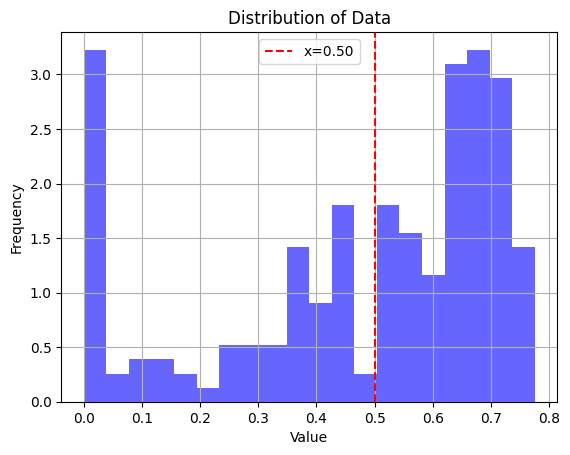

Frequency between 0.40 and 0.60: 51
Frequency frequency_0_to_0_40: 62
Frequency frequency_0_60_to_1: 87


In [111]:
import numpy as np
import matplotlib.pyplot as plt


plt.hist(prob, bins=20, density=True, alpha=0.6, color='b')

# Add a vertical line at x=0.50
plt.axvline(x=0.50, color='red', linestyle='--', label='x=0.50')

# Calculate the frequency of data points between 0.40 and 0.60
frequency = len([x for x in prob if 0.40 <= x <= 0.60])

frequency_0_to_0_40 = len([x for x in prob if 0 <= x <= 0.40])

# Calculate the frequency of data points between 0.60 and 1
frequency_0_60_to_1 = len([x for x in prob if 0.60 <= x <= 1])


# Customize the plot with labels, title, and other settings
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.grid(True)

# Display the plot
plt.legend()
plt.show()

print(f"Frequency between 0.40 and 0.60: {frequency}")
print(f"Frequency frequency_0_to_0_40: {frequency_0_to_0_40}")
print(f"Frequency frequency_0_60_to_1: {frequency_0_60_to_1}")




In [112]:
tempTest["Sig"] = prob
tempTest["Predict"] = inp
tempTest

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,Sig,Predict
0,49,0,0,83.91,29.100000,0,0,1,0,1,0,0,1,0,0,0,0,0.526032,1.0
1,28,0,0,97.79,25.600000,0,1,0,0,1,0,0,1,0,0,1,0,0.071302,0.0
2,38,0,0,104.97,21.700000,0,1,0,0,1,0,0,1,0,0,1,0,0.243623,0.0
3,65,0,0,108.46,34.500000,0,0,1,0,1,0,0,1,0,0,1,0,0.579606,1.0
4,50,0,0,84.14,21.500000,0,1,0,0,1,0,0,1,0,0,0,0,0.363681,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,82,0,0,72.70,18.000000,0,1,0,0,1,0,0,0,1,0,0,1,0.680544,1.0
196,51,0,0,111.91,29.756194,0,0,1,0,1,0,0,1,0,0,1,1,0.478697,0.0
197,42,0,0,83.41,25.400000,0,0,1,0,1,0,0,1,0,0,1,1,0.364525,0.0
198,68,0,0,233.94,42.400000,0,0,1,0,1,0,0,1,0,0,1,1,0.634714,1.0


In [113]:
tempN = tempTest[100:]
tempP = tempTest[:100]
fn = tempN[(tempN["stroke"] == 1) & (tempN["Predict"] == 0)]
tn = tempN[(tempN["stroke"] == 1) & (tempN["Predict"] == 1)]

fp = tempP[(tempP["stroke"] == 0) & (tempP["Predict"] == 1)]
tp = tempP[(tempP["stroke"] == 0) & (tempP["Predict"] == 0)]
fp

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,Sig,Predict
0,49,0,0,83.91,29.100000,0,0,1,0,1,0,0,1,0,0,0,0,0.526032,1.0
3,65,0,0,108.46,34.500000,0,0,1,0,1,0,0,1,0,0,1,0,0.579606,1.0
9,52,0,0,69.91,28.600000,2,1,0,0,1,0,0,1,0,0,1,0,0.505982,1.0
10,73,0,0,118.33,23.100000,1,0,1,0,1,0,0,1,0,0,1,0,0.691143,1.0
11,76,0,0,83.16,19.900000,0,1,0,0,0,0,0,0,1,0,0,0,0.710725,1.0
13,59,0,0,68.22,27.100000,0,0,1,0,1,0,0,0,1,0,0,0,0.542966,1.0
15,55,0,0,65.88,32.800000,1,1,0,0,0,0,0,1,0,0,1,0,0.513151,1.0
16,70,0,1,223.96,38.200000,0,0,1,0,1,1,0,0,0,0,1,0,0.588638,1.0
19,71,0,0,65.69,36.500000,0,1,0,0,1,0,0,0,1,0,0,0,0.550922,1.0
22,63,0,1,194.93,24.900000,1,0,1,0,1,0,0,1,0,0,1,0,0.675721,1.0


In [114]:
fn["per2"] = 2
fp["per2"] = 3
tp["per2"] = tp["stroke"]
tn["per2"] = tn["stroke"]
tempResult = pd.concat([fn, fp, tp, tn])
tempResult

<ipython-input-114-47680ef1ba52>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-47680ef1ba52>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-47680ef1ba52>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-476

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,Sig,Predict,per2
101,34,0,0,85.27,26.6,1,1,0,0,0,0,0,1,0,0,0,1,0.174330,0.0,2
106,42,0,0,61.42,30.2,0,0,1,0,0,0,0,1,0,0,0,1,0.445947,0.0,2
116,59,0,0,96.16,44.1,0,0,1,0,1,0,0,1,0,0,1,1,0.457178,0.0,2
129,45,0,0,69.44,36.6,2,1,0,0,1,1,0,0,0,0,0,1,0.437487,0.0,2
136,48,0,0,84.20,29.7,0,0,1,0,0,1,0,0,0,0,0,1,0.199578,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,80,0,0,106.72,27.8,0,1,0,0,1,0,0,1,0,0,0,1,0.648440,1.0,1
194,50,1,0,167.41,30.9,0,1,0,0,1,0,0,0,1,0,1,1,0.547243,1.0,1
195,82,0,0,72.70,18.0,0,1,0,0,1,0,0,0,1,0,0,1,0.680544,1.0,1
198,68,0,0,233.94,42.4,0,0,1,0,1,0,0,1,0,0,1,1,0.634714,1.0,1


In [115]:
tempResult = tempResult.sort_index(ascending=True)
tempResult["per2"].unique()

array([3, 0, 1, 2])

In [116]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA, KernelPCA


pca_scaled = PCA(n_components=3, random_state=42)

x_pca_s = pca_scaled.fit_transform(tempResult)


fig = px.scatter_3d(pd.DataFrame(x_pca_s), x=0, y=1, z=2, color=tempResult['per2'])
fig.show()

In [131]:
df = tempResult[(tempResult["Sig"] > 0.60) | (tempResult["Sig"] < 0.40)]
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,Sig,Predict,per2
1,28,0,0,97.79,25.6,0,1,0,0,1,0,0,1,0,0,1,0,0.071302,0.0,0
2,38,0,0,104.97,21.7,0,1,0,0,1,0,0,1,0,0,1,0,0.243623,0.0,0
4,50,0,0,84.14,21.5,0,1,0,0,1,0,0,1,0,0,0,0,0.363681,0.0,0
5,44,0,0,91.78,23.3,1,1,0,0,1,1,0,0,0,0,1,0,0.329790,0.0,0
6,11,0,0,93.25,26.1,0,0,1,0,0,0,0,0,0,1,1,0,0.002871,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,80,0,0,106.72,27.8,0,1,0,0,1,0,0,1,0,0,0,1,0.648440,1.0,1
195,82,0,0,72.70,18.0,0,1,0,0,1,0,0,0,1,0,0,1,0.680544,1.0,1
197,42,0,0,83.41,25.4,0,0,1,0,1,0,0,1,0,0,1,1,0.364525,0.0,2
198,68,0,0,233.94,42.4,0,0,1,0,1,0,0,1,0,0,1,1,0.634714,1.0,1


In [121]:
saveDF = tempResult[(tempResult["Sig"] <= 0.60) & (tempResult["Sig"] >= 0.40)]

saveDF.to_csv('/content/drive/MyDrive/Result/temp30%.csv')

In [118]:
x_pca_s3 = pca_scaled.fit_transform(df)
fig = px.scatter_3d(pd.DataFrame(x_pca_s3), x=0, y=1, z=2, color=df['per2'])
fig.show()

In [132]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,stroke,Sig,Predict,per2
1,28,0,0,97.79,25.6,0,1,0,0,1,0,0,1,0,0,1,0,0.071302,0.0,0
2,38,0,0,104.97,21.7,0,1,0,0,1,0,0,1,0,0,1,0,0.243623,0.0,0
4,50,0,0,84.14,21.5,0,1,0,0,1,0,0,1,0,0,0,0,0.363681,0.0,0
5,44,0,0,91.78,23.3,1,1,0,0,1,1,0,0,0,0,1,0,0.329790,0.0,0
6,11,0,0,93.25,26.1,0,0,1,0,0,0,0,0,0,1,1,0,0.002871,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,80,0,0,106.72,27.8,0,1,0,0,1,0,0,1,0,0,0,1,0.648440,1.0,1
195,82,0,0,72.70,18.0,0,1,0,0,1,0,0,0,1,0,0,1,0.680544,1.0,1
197,42,0,0,83.41,25.4,0,0,1,0,1,0,0,1,0,0,1,1,0.364525,0.0,2
198,68,0,0,233.94,42.4,0,0,1,0,1,0,0,1,0,0,1,1,0.634714,1.0,1


In [119]:
print(classification_report(df["stroke"], df["Predict"]))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        68
           1       0.89      0.95      0.92        81

    accuracy                           0.91       149
   macro avg       0.91      0.90      0.90       149
weighted avg       0.91      0.91      0.91       149



In [122]:
print(classification_report(saveDF["stroke"], saveDF["Predict"]))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50        32
           1       0.39      0.63      0.48        19

    accuracy                           0.49        51
   macro avg       0.52      0.52      0.49        51
weighted avg       0.55      0.49      0.49        51



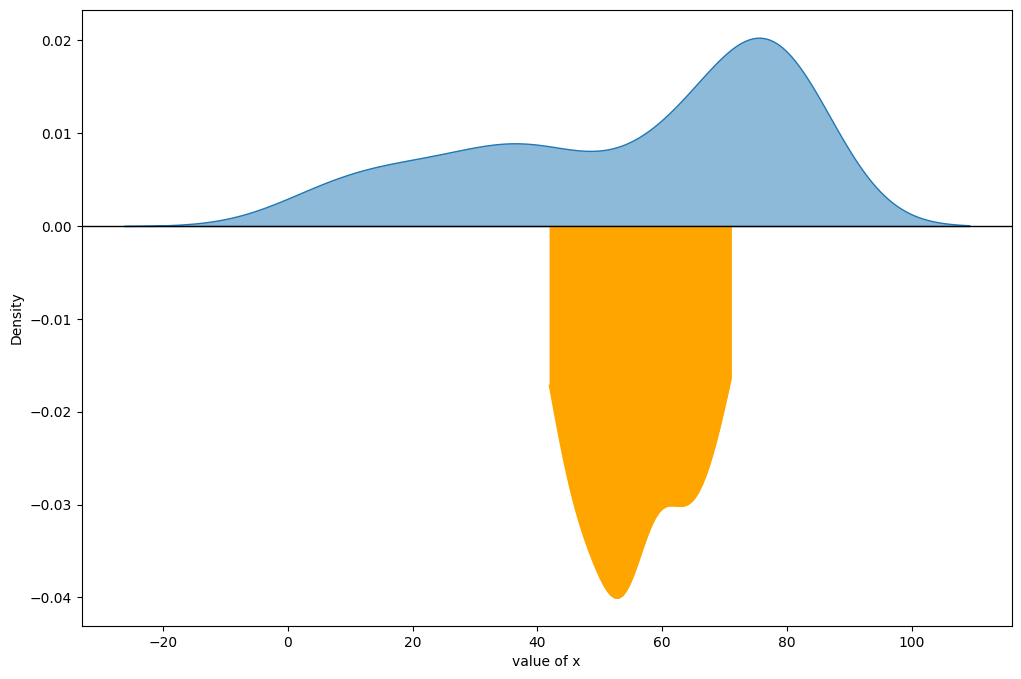

In [142]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe


# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
sns.kdeplot(data=df, x="age",  fill=True, alpha=.5)

# plot density chart for var2
kde = gaussian_kde(saveDF.age)
x_range = linspace(min(saveDF.age), max(saveDF.age), len(saveDF.age))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range, y=kde(x_range) * -1, color='orange')
plt.fill_between(x_range, kde(x_range) * -1, color='orange')

# add axis names
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')



# show the graph
plt.show()

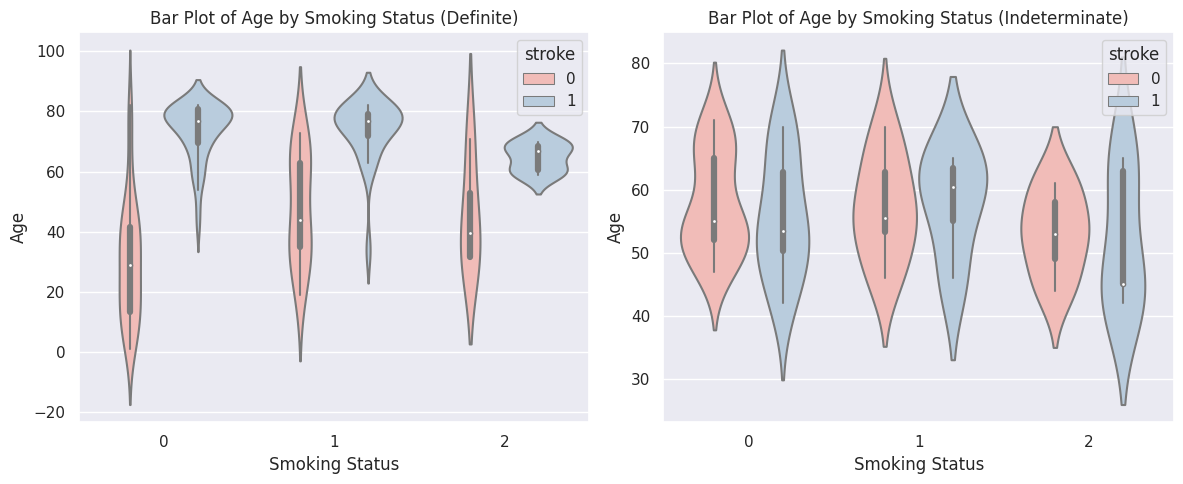

In [162]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

sns.fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


# Grouped violinplot


#sns.barplot(x='smoking_status', y='age', data=df, )
sns.violinplot(x="smoking_status", y="age", hue="stroke", data=df, palette="Pastel1" ,ax=axes[0])

axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Age')
axes[0].set_title('Bar Plot of Age by Smoking Status (Definite)')

# Plot for 'saveDF'
#sns.barplot(x='smoking_status', y='age', data=saveDF, ax=axes[1])
sns.violinplot(x="smoking_status", y="age", hue="stroke", data=saveDF, palette="Pastel1" ,ax=axes[1])

axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Age')
axes[1].set_title('Bar Plot of Age by Smoking Status (Indeterminate)')

# Adjust layout for better spacing
plt.tight_layout()



# Show the plot
plt.show()

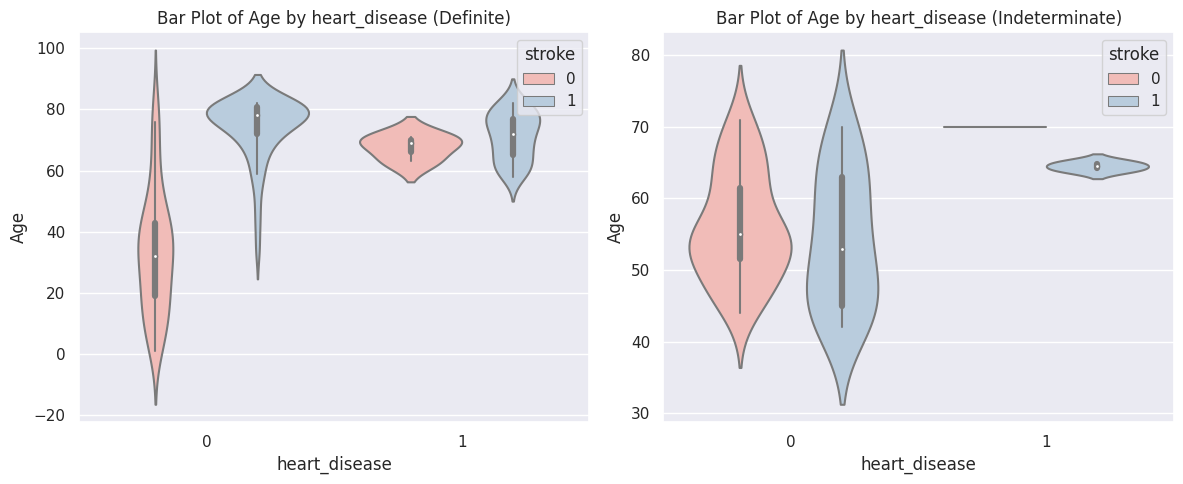

In [166]:
import numpy as np
import matplotlib.pyplot as plt

sns.fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


sns.violinplot(x="heart_disease", y="age", hue="stroke", data=df, palette="Pastel1" ,ax=axes[0])

axes[0].set_xlabel('heart_disease')
axes[0].set_ylabel('Age')
axes[0].set_title('Bar Plot of Age by heart_disease (Definite)')

# Plot for 'saveDF'
sns.violinplot(x="heart_disease", y="age", hue="stroke", data=saveDF, palette="Pastel1" ,ax=axes[1])

axes[1].set_xlabel('heart_disease')
axes[1].set_ylabel('Age')
axes[1].set_title('Bar Plot of Age by heart_disease (Indeterminate)')

# Adjust layout for better spacing
plt.tight_layout()



# Show the plot
plt.show()

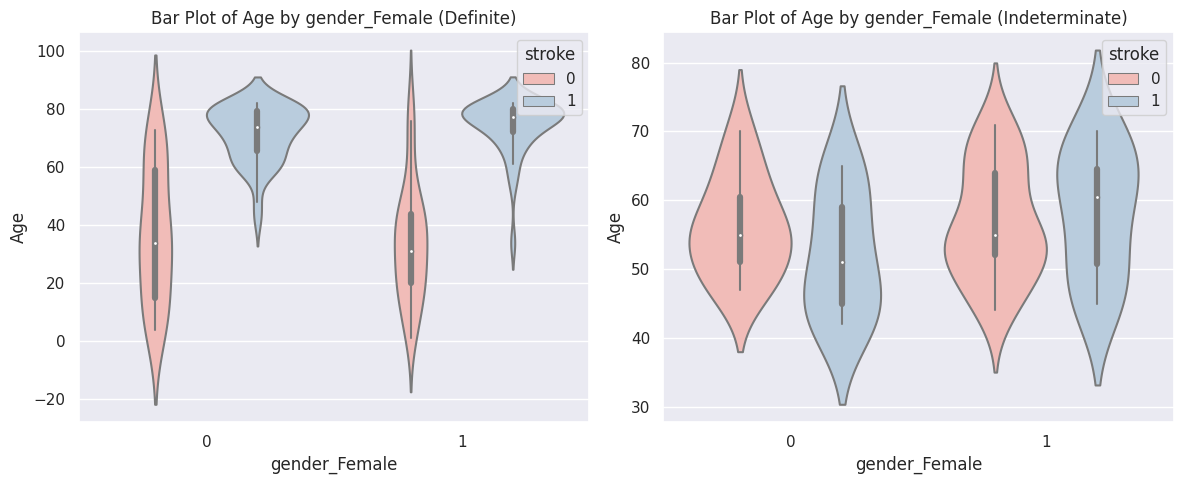

In [167]:
import numpy as np
import matplotlib.pyplot as plt

sns.fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


sns.violinplot(x="gender_Female", y="age", hue="stroke", data=df, palette="Pastel1" ,ax=axes[0])

axes[0].set_xlabel('gender_Female')
axes[0].set_ylabel('Age')
axes[0].set_title('Bar Plot of Age by gender_Female (Definite)')

# Plot for 'saveDF'
sns.violinplot(x="gender_Female", y="age", hue="stroke", data=saveDF, palette="Pastel1" ,ax=axes[1])

axes[1].set_xlabel('gender_Female')
axes[1].set_ylabel('Age')
axes[1].set_title('Bar Plot of Age by gender_Female (Indeterminate)')

# Adjust layout for better spacing
plt.tight_layout()



# Show the plot
plt.show()



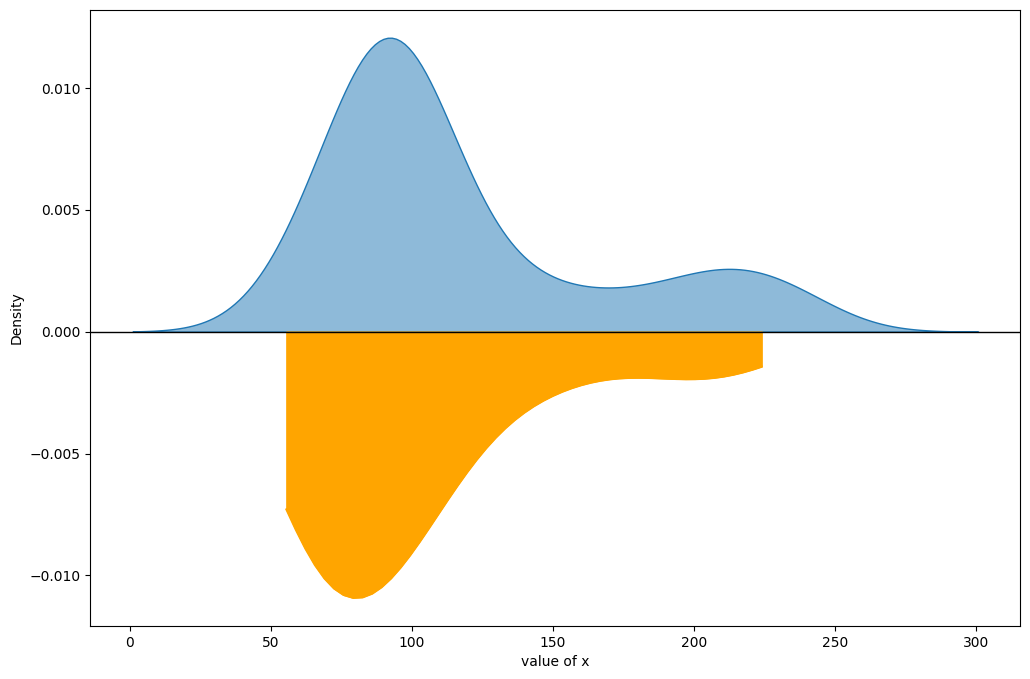

In [147]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
sns.kdeplot(data=df, x="avg_glucose_level",  fill=True, alpha=.5)

# plot density chart for var2
kde = gaussian_kde(saveDF.avg_glucose_level)
x_range = linspace(min(saveDF.avg_glucose_level), max(saveDF.avg_glucose_level), len(saveDF.avg_glucose_level))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range, y=kde(x_range) * -1, color='orange')
plt.fill_between(x_range, kde(x_range) * -1, color='orange')

# add axis names
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')



# show the graph
plt.show()

In [ ]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe


# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
sns.kdeplot(data=df, x="age",  fill=True, alpha=.5)

# plot density chart for var2
kde = gaussian_kde(saveDF.age)
x_range = linspace(min(saveDF.age), max(saveDF.age), len(saveDF.age))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range, y=kde(x_range) * -1, color='orange')
plt.fill_between(x_range, kde(x_range) * -1, color='orange')

# add axis names
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')



# show the graph
plt.show()

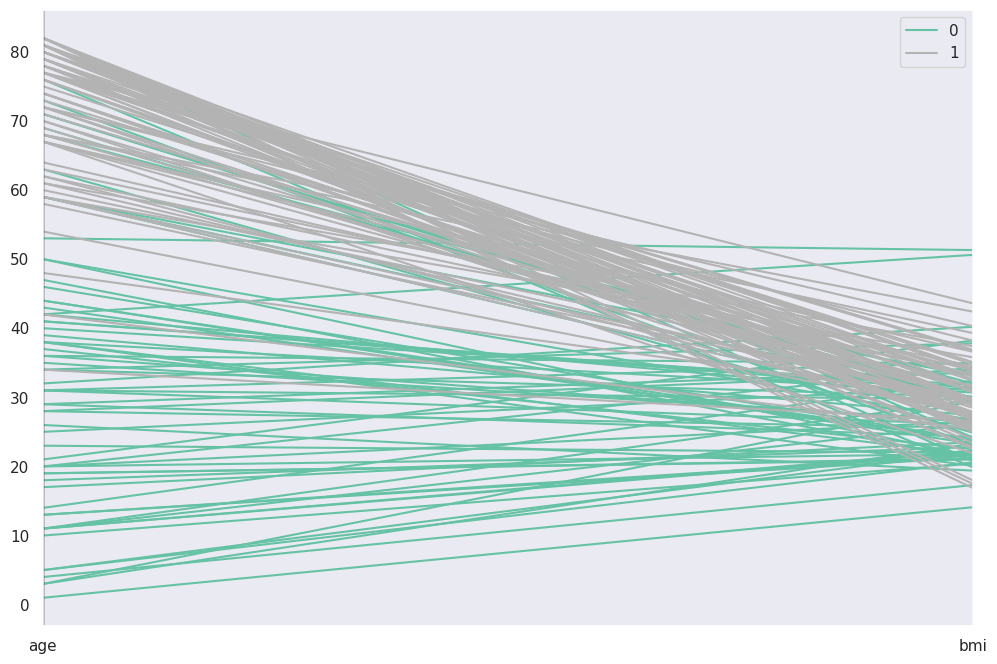

In [170]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Make the plot
parallel_coordinates(df[["age","stroke",	"bmi"]], 'stroke', colormap=plt.get_cmap("Set2"))
plt.show()


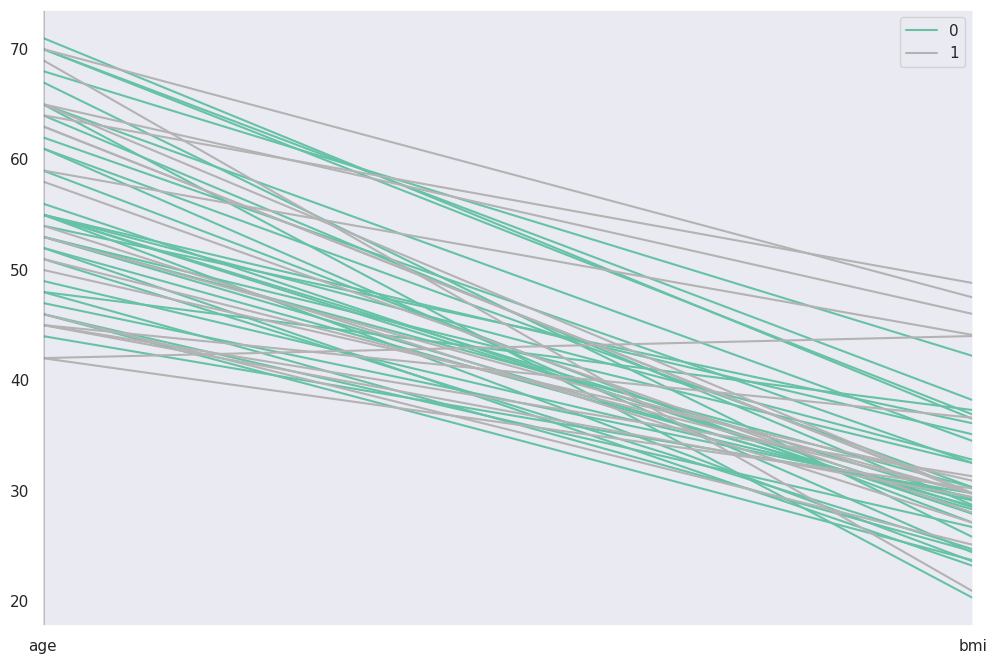

In [171]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Make the plot
parallel_coordinates(saveDF[["age","stroke",	"bmi"]], 'stroke', colormap=plt.get_cmap("Set2"))
plt.show()


# new test

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

metrics_dict_data = {
    'Mean Accuracy': 81,
    'Mean F1-Score': 82,
    'Mean Recall': 87,
    'Mean Precision': 78,
    'Mean AUC': round(roc_auc_score(labels, inp.squeeze()), 2),
    'Mean Fall-Out':0,
    'Mean Miss-Rate':0,
    "tresh" : 50
}

result_df = pd.DataFrame([metrics_dict_data])

# Concatenate the two DataFrames vertically
result_df.to_csv('/content/drive/MyDrive/Result/New-Weight/resultB.csv')

In [ ]:
x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x + 0.1 * torch.randn(x.size())

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

def train_model(iter):
    for epoch in range(iter):
        y1 = model(x)
        loss = criterion(y1, y)
        writer.add_scalar("Loss/train", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

train_model(10)
writer.flush()